In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ISHAN DASGUPTA/Downloads/netflix_data_analysis.csv')

In [3]:
df.head()

,Release Date,Title,Genre,Overview,Popularity,Vote Count,Vote Average,Original Language,Poster URL
0,01-12-2010,The Social Network,Drama,Based on the founding of Facebook,85.5,1200,7.7,en,https://example.com/poster1.jpg
1,15-07-2011,Friends: The Reunion,Comedy,A reunion special with the cast of Friends,90.2,1500,8.5,en,https://example.com/poster2.jpg
2,01-11-2012,The Hunger Games,Action,Dystopian future where children fight to the d...,95.3,2000,7.2,en,https://example.com/poster3.jpg
3,20-03-2015,House of Cards,Drama,A politician's ruthless rise to power,88.1,1800,8.8,en,https://example.com/poster4.jpg
4,15-08-2016,Stranger Things,Sci-Fi,A group of kids uncover supernatural mysteries,92.4,2500,8.7,en,https://example.com/poster5.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release Date       10 non-null     object 
 1   Title              10 non-null     object 
 2   Genre              10 non-null     object 
 3   Overview           10 non-null     object 
 4   Popularity         10 non-null     float64
 5   Vote Count         10 non-null     int64  
 6   Vote Average       10 non-null     float64
 7   Original Language  10 non-null     object 
 8   Poster URL         10 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes


In [5]:
df['Genre'].head()

0     Drama
1    Comedy
2    Action
3     Drama
4    Sci-Fi
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote Count,Vote Average
count,10.000000,10.000000,10.000000
mean,89.850000,2620.000000,8.200000
std,3.464503,1099.292702,0.522813
min,85.000000,1200.000000,7.200000
25%,87.650000,1850.000000,7.825000
50%,89.600000,2350.000000,8.400000
75%,92.175000,3375.000000,8.575000
max,95.300000,4500.000000,8.800000


In [8]:
df.head()

,Release Date,Title,Genre,Overview,Popularity,Vote Count,Vote Average,Original Language,Poster URL
0,01-12-2010,The Social Network,Drama,Based on the founding of Facebook,85.5,1200,7.7,en,https://example.com/poster1.jpg
1,15-07-2011,Friends: The Reunion,Comedy,A reunion special with the cast of Friends,90.2,1500,8.5,en,https://example.com/poster2.jpg
2,01-11-2012,The Hunger Games,Action,Dystopian future where children fight to the d...,95.3,2000,7.2,en,https://example.com/poster3.jpg
3,20-03-2015,House of Cards,Drama,A politician's ruthless rise to power,88.1,1800,8.8,en,https://example.com/poster4.jpg
4,15-08-2016,Stranger Things,Sci-Fi,A group of kids uncover supernatural mysteries,92.4,2500,8.7,en,https://example.com/poster5.jpg


In [9]:
df['Release Date'] = pd.to_datetime(df['Release Date'], dayfirst=True, errors='coerce')

print(df['Release Date'].dtypes)

datetime64[ns]


In [10]:
df['Release Date'] = df['Release Date'].dt.year

df['Release Date'].dtypes

dtype('int32')

In [11]:
df.head()

,Release Date,Title,Genre,Overview,Popularity,Vote Count,Vote Average,Original Language,Poster URL
0,2010,The Social Network,Drama,Based on the founding of Facebook,85.5,1200,7.7,en,https://example.com/poster1.jpg
1,2011,Friends: The Reunion,Comedy,A reunion special with the cast of Friends,90.2,1500,8.5,en,https://example.com/poster2.jpg
2,2012,The Hunger Games,Action,Dystopian future where children fight to the d...,95.3,2000,7.2,en,https://example.com/poster3.jpg
3,2015,House of Cards,Drama,A politician's ruthless rise to power,88.1,1800,8.8,en,https://example.com/poster4.jpg
4,2016,Stranger Things,Sci-Fi,A group of kids uncover supernatural mysteries,92.4,2500,8.7,en,https://example.com/poster5.jpg


Dropping the columns

In [12]:
cols = ['Overview','Original Language','Poster URL']

In [13]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release Date', 'Title', 'Genre', 'Popularity', 'Vote Count',
       'Vote Average'],
      dtype='object')

categorizing Vote_Average column

We would the Vote_Average values and make 4 categories:popular average below_avg not_popular to describe it more using categorize_col() function provided above.

In [14]:
def categorize_col(df, col, lebels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [15]:
labels = ['not_popular', 'below_avg','average','popular']
categorize_col(df, 'Vote Average', labels)
df['Vote Average'].unique()

['not_popular', 'average', NaN, 'popular', 'below_avg']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [16]:
df.head()

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average
2,2012,The Hunger Games,Action,95.3,2000,NaN
3,2015,House of Cards,Drama,88.1,1800,popular
4,2016,Stranger Things,Sci-Fi,92.4,2500,popular


In [17]:
df['Vote Average'].value_counts()

Vote Average
popular        3
not_popular    2
below_avg      2
average        2
Name: count, dtype: int64

In [18]:
df.dropna(inplace = True)

df.isna().sum()

Release Date    0
Title           0
Genre           0
Popularity      0
Vote Count      0
Vote Average    0
dtype: int64

In [19]:
df.head()

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average
3,2015,House of Cards,Drama,88.1,1800,popular
4,2016,Stranger Things,Sci-Fi,92.4,2500,popular
5,2018,Deadpool 2,Action,89.0,2200,below_avg


# we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [20]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average
2,2015,House of Cards,Drama,88.1,1800,popular
3,2016,Stranger Things,Sci-Fi,92.4,2500,popular
4,2018,Deadpool 2,Action,89.0,2200,below_avg


In [21]:
#casting column into cateogy

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Comedy', 'Drama', 'Sci-Fi'], ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release Date  9 non-null      int32   
 1   Title         9 non-null      object  
 2   Genre         9 non-null      category
 3   Popularity    9 non-null      float64 
 4   Vote Count    9 non-null      int64   
 5   Vote Average  9 non-null      category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 806.0+ bytes


In [23]:
df.nunique()

Release Date    9
Title           9
Genre           4
Popularity      9
Vote Count      9
Vote Average    4
dtype: int64

In [24]:
df.head()

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average
2,2015,House of Cards,Drama,88.1,1800,popular
3,2016,Stranger Things,Sci-Fi,92.4,2500,popular
4,2018,Deadpool 2,Action,89.0,2200,below_avg


# Data Visualization

In [25]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [26]:
df['Genre'].describe()

count         9
unique        4
top       Drama
freq          4
Name: Genre, dtype: object

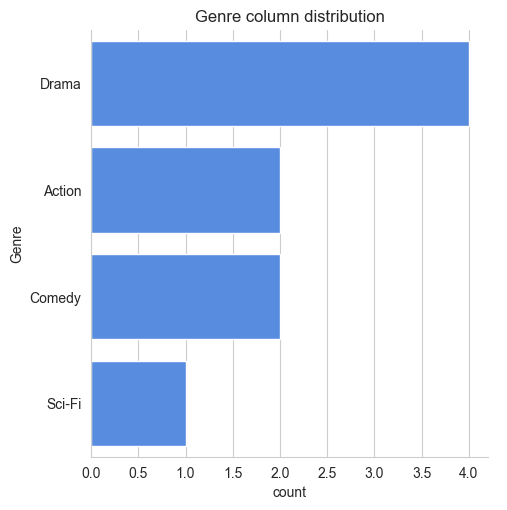

In [27]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# Which has highest votes in vote avg column?

In [28]:
df.head()

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average
2,2015,House of Cards,Drama,88.1,1800,popular
3,2016,Stranger Things,Sci-Fi,92.4,2500,popular
4,2018,Deadpool 2,Action,89.0,2200,below_avg


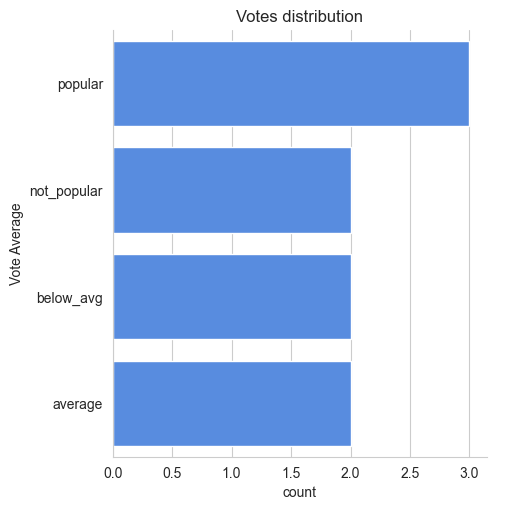

In [29]:
sns.catplot(y = 'Vote Average', data = df, kind = 'count',
            order = df['Vote Average'].value_counts().index,
            color = '#4287f5')
plt.title('Votes distribution')

plt.show()

# What movie got the highest popularity? What's its genre?

In [30]:
df.head(2)

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
0,2010,The Social Network,Drama,85.5,1200,not_popular
1,2011,Friends: The Reunion,Comedy,90.2,1500,average


In [31]:
df[df['Popularity'] == df['Popularity'].max()]

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
6,2021,Money Heist: Part 5,Action,94.0,3500,below_avg


# What movie got the lowest popularity? What's its genre?

In [32]:
df[df['Popularity'] == df['Popularity'].min()]

,Release Date,Title,Genre,Popularity,Vote Count,Vote Average
8,2023,Queen Charlotte: A Bridgerton Story,Drama,85.0,4500,not_popular


# Which year has the most filmmed movies?

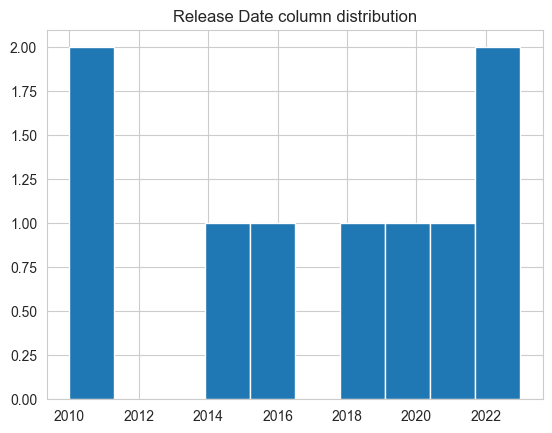

In [33]:
df['Release Date'].hist()
plt.title('Release Date column distribution')
plt.show()

Conclusion
Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

02: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

Q4: Which year has the most filmmed movies?

year 2020 has the highest filmming rate in our dataset.